<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/VS_Code_Craft_cycle_detection_in_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cycle Detection in Undirected Graphs

This notebook demonstrates how to determine if an undirected graph contains a cycle using a depth-first search (DFS) algorithm.



## Cycle Detection Algorithm

The `has_cycle` function implements a depth-first search (DFS) to detect cycles in an undirected graph. It traverses the graph,
marking nodes as visited. If it encounters a node that has been visited and is not the direct parent of the current node,
a cycle exists.


In [1]:

def has_cycle(graph):
    visited = set()

    def dfs(node, parent):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs(neighbor, node):
                    return True
            elif neighbor != parent:
                return True
        return False

    for node in graph:
        if node not in visited:
            if dfs(node, None):
                return True

    return False



## Test Harness

A test harness is implemented to verify the correctness of the `has_cycle` function. It includes various test cases such as
acyclic graphs, graphs with simple cycles, disconnected graphs with and without cycles, and edge cases like single-node graphs.


In [2]:

def test_has_cycle():
    def make_graph(edges):
        graph = {}
        for u, v in edges:
            if u not in graph:
                graph[u] = []
            if v not in graph:
                graph[v] = []
            graph[u].append(v)
            graph[v].append(u)
        return graph

    tests = [
        ([(0, 1), (1, 2), (2, 3)], False),
        ([(0, 1), (1, 2), (2, 3), (3, 0)], True),
        ([(0, 1), (2, 3), (3, 4), (4, 2)], True),
        ([(0, 1), (2, 3)], False),
        ([(0, 1)], False),
        ([(0, 0)], True),
        ([], False)
    ]

    all_passed = True
    for edges, expected in tests:
        graph = make_graph(edges)
        result = has_cycle(graph)
        if result != expected:
            print(f"Test failed for edges {edges}: expected {expected}, got {result}")
            all_passed = False

    if all_passed:
        print("All tests passed!")

test_has_cycle()


All tests passed!



## Graph Visualization

To illustrate the correctness of the tests, graphs are plotted for each test case. These visualizations show whether a cycle
is expected and the actual outcome of the function.


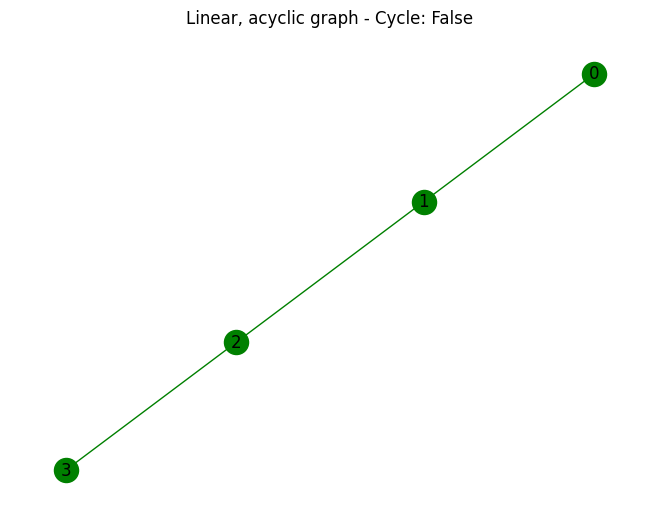

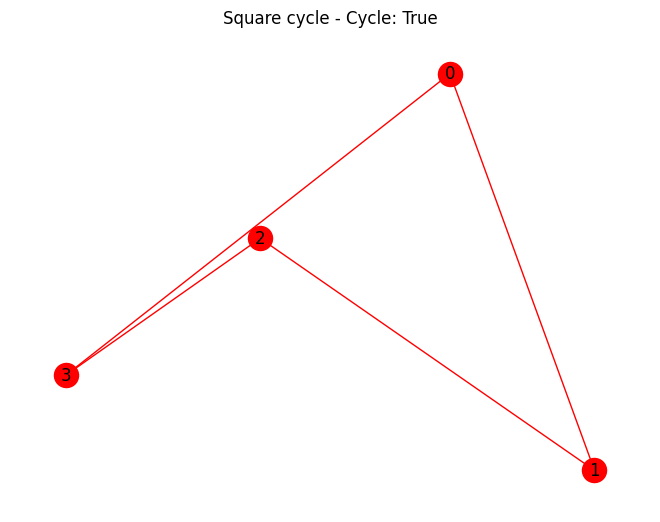

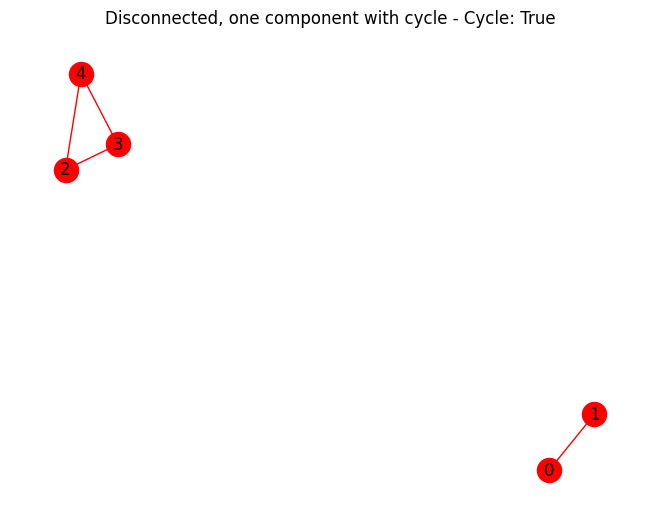

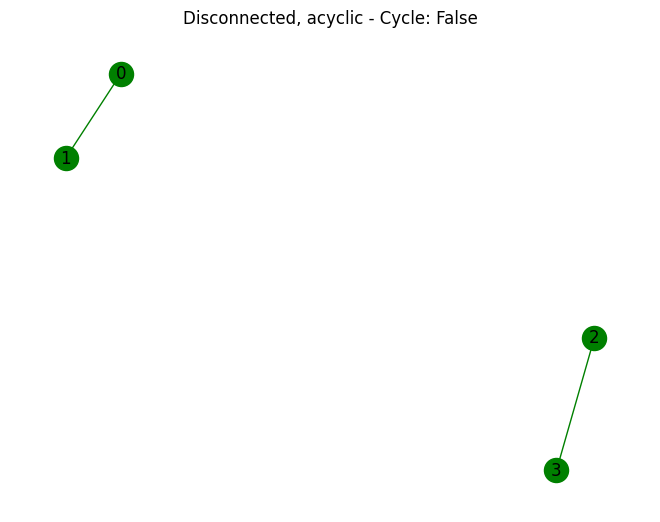

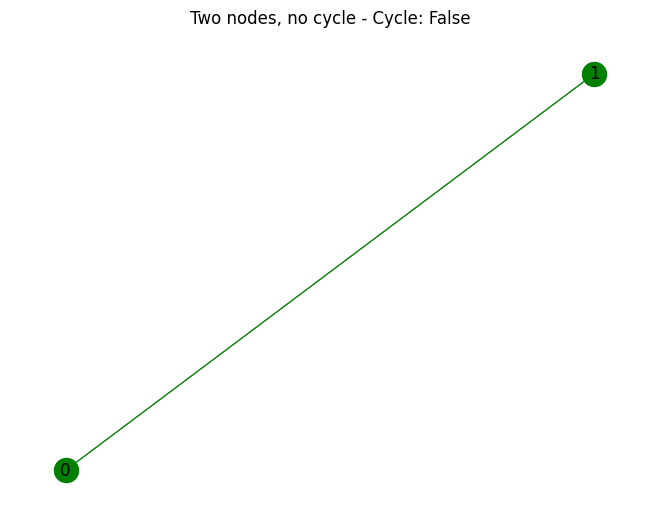

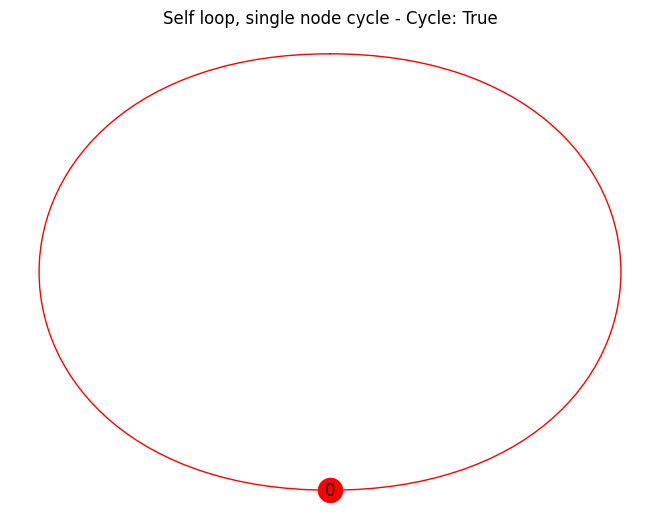

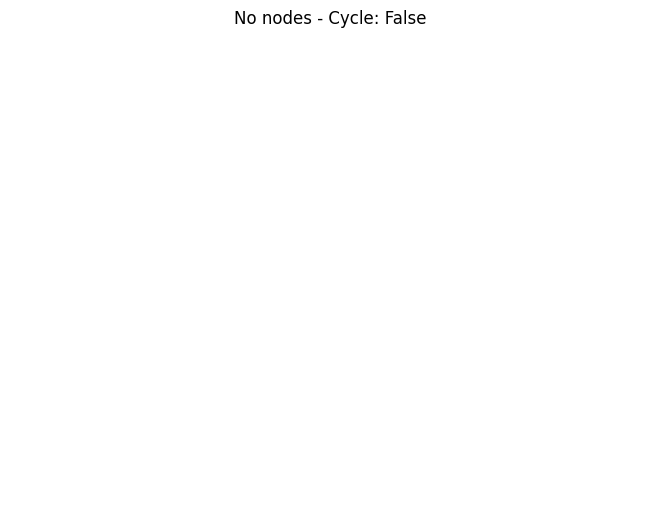

In [3]:

import matplotlib.pyplot as plt
import networkx as nx

def plot_graph(edges, has_cycle, title):
    G = nx.Graph()
    G.add_edges_from(edges)
    color = 'red' if has_cycle else 'green'
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=color, edge_color=color)
    plt.title(title)
    plt.show()

test_cases = [
    ([(0, 1), (1, 2), (2, 3)], False, "Linear, acyclic graph"),
    ([(0, 1), (1, 2), (2, 3), (3, 0)], True, "Square cycle"),
    ([(0, 1), (2, 3), (3, 4), (4, 2)], True, "Disconnected, one component with cycle"),
    ([(0, 1), (2, 3)], False, "Disconnected, acyclic"),
    ([(0, 1)], False, "Two nodes, no cycle"),
    ([(0, 0)], True, "Self loop, single node cycle"),
    ([], False, "No nodes")
]

for edges, cycle, title in test_cases:
    plot_graph(edges, cycle, f"{title} - Cycle: {cycle}")
